In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,confusion_matrix
from graphviz import Digraph

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

dataset_path = '/content/drive/MyDrive/CSE475/Mangoleaf_Dataset'

# Initialize ImageDataGenerator for EDA and model training
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load training data
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Load validation data
validation_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 3200 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


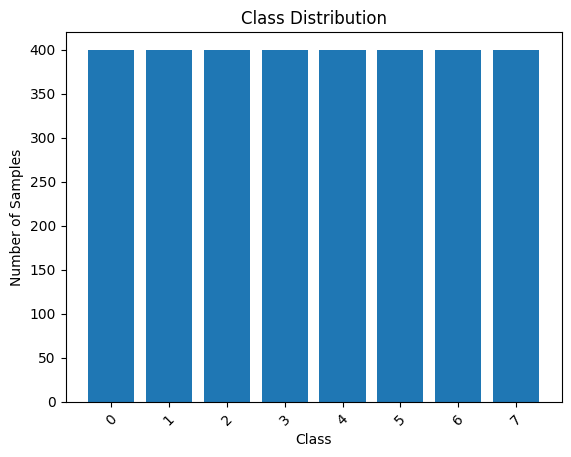

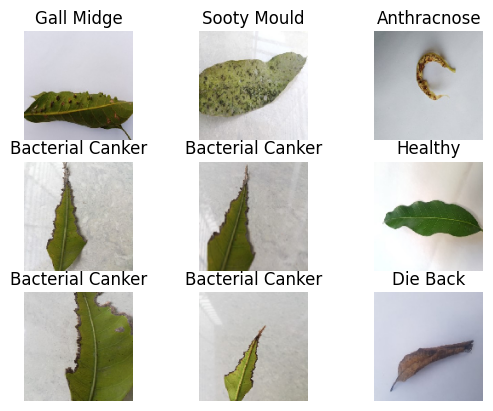

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Check the class distribution
labels, counts = np.unique(train_data.classes, return_counts=True)

# Create a bar chart
plt.bar(labels, counts)
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=45)
plt.show()

# Visualize a few images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img, label = next(train_data)  # Use next() with train_data directly
    plt.imshow(img[0])
    plt.title(list(train_data.class_indices.keys())[np.argmax(label[0])])
    plt.axis('off')

plt.show()




In [7]:

import seaborn as sns
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up paths
data_dir = "/content/drive/MyDrive/CSE475/Mangoleaf_Dataset"
img_size = (128, 128)  # Resize to this fixed size

# Initialize empty lists to store features and labels
features = []
labels = []

# Loop through each class directory
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            # Read and resize the image
            img = cv2.imread(img_path)
            img = cv2.resize(img, img_size)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Extract color histograms for each channel
            hist_r = cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
            hist_g = cv2.calcHist([img], [1], None, [256], [0, 256]).flatten()
            hist_b = cv2.calcHist([img], [2], None, [256], [0, 256]).flatten()

            # Extract basic statistical features
            mean, std_dev = img.mean(), img.std()
            skewness = (img - mean).mean() ** 3 / std_dev ** 3

            # Combine features
            image_features = np.concatenate((hist_r, hist_g, hist_b, [mean, std_dev, skewness]))
            features.append(image_features)
            labels.append(class_name)

# Convert to DataFrame
df = pd.DataFrame(features)
df['Label'] = labels

# Display basic information
print(df.head())
print(df.describe())




     0    1    2    3    4    5    6    7    8    9  ...  762  763  764  765  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   766  767         768        769           770           Label  
0  0.0  0.0  177.528788  39.195939  1.412094e-47  Cutting Weevil  
1  0.0  0.0  180.375936  46.228852 -2.474183e-47  Cutting Weevil  
2  0.0  0.0  179.811340  38.303003  0.000000e+00  Cutting Weevil  
3  0.0  0.0  175.250895  45.552326  3.860248e-47  Cutting Weevil  
4  0.0  0.0  167.651978  44.588422  0.000000e+00  Cutting Weevil  

[5 rows x 772 columns]
              0            1            2            3            4    \
count  4000.00000  4

In [8]:
# Describe the dataset
description = df.describe()
print("Dataset Summary:")
print(description)

Dataset Summary:
              0            1            2            3            4    \
count  4000.00000  4000.000000  4000.000000  4000.000000  4000.000000   
mean      0.00900     0.026000     0.009000     0.009750     0.013750   
std       0.52296     1.458374     0.215478     0.172228     0.268475   
min       0.00000     0.000000     0.000000     0.000000     0.000000   
25%       0.00000     0.000000     0.000000     0.000000     0.000000   
50%       0.00000     0.000000     0.000000     0.000000     0.000000   
75%       0.00000     0.000000     0.000000     0.000000     0.000000   
max      33.00000    92.000000    11.000000     6.000000    15.000000   

               5            6            7            8           9    ...  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.00000  ...   
mean      0.032750     0.064250     0.091000     0.130750     0.17575  ...   
std       0.444102     0.723708     1.174335     1.678201     2.48946  ...   
min       0.0

In [9]:
# Pairwise scatter plot for the first few features, labeled by class
# Only select a subset of features to keep the plot clear
subset_df = df.iloc[:, :10]  # Adjust this to select relevant features, e.g., histograms and stats
subset_df['Label'] = df['Label']

In [10]:
# Set up Seaborn styling for aesthetics
sns.set(style="whitegrid")


<Figure size 1200x800 with 0 Axes>

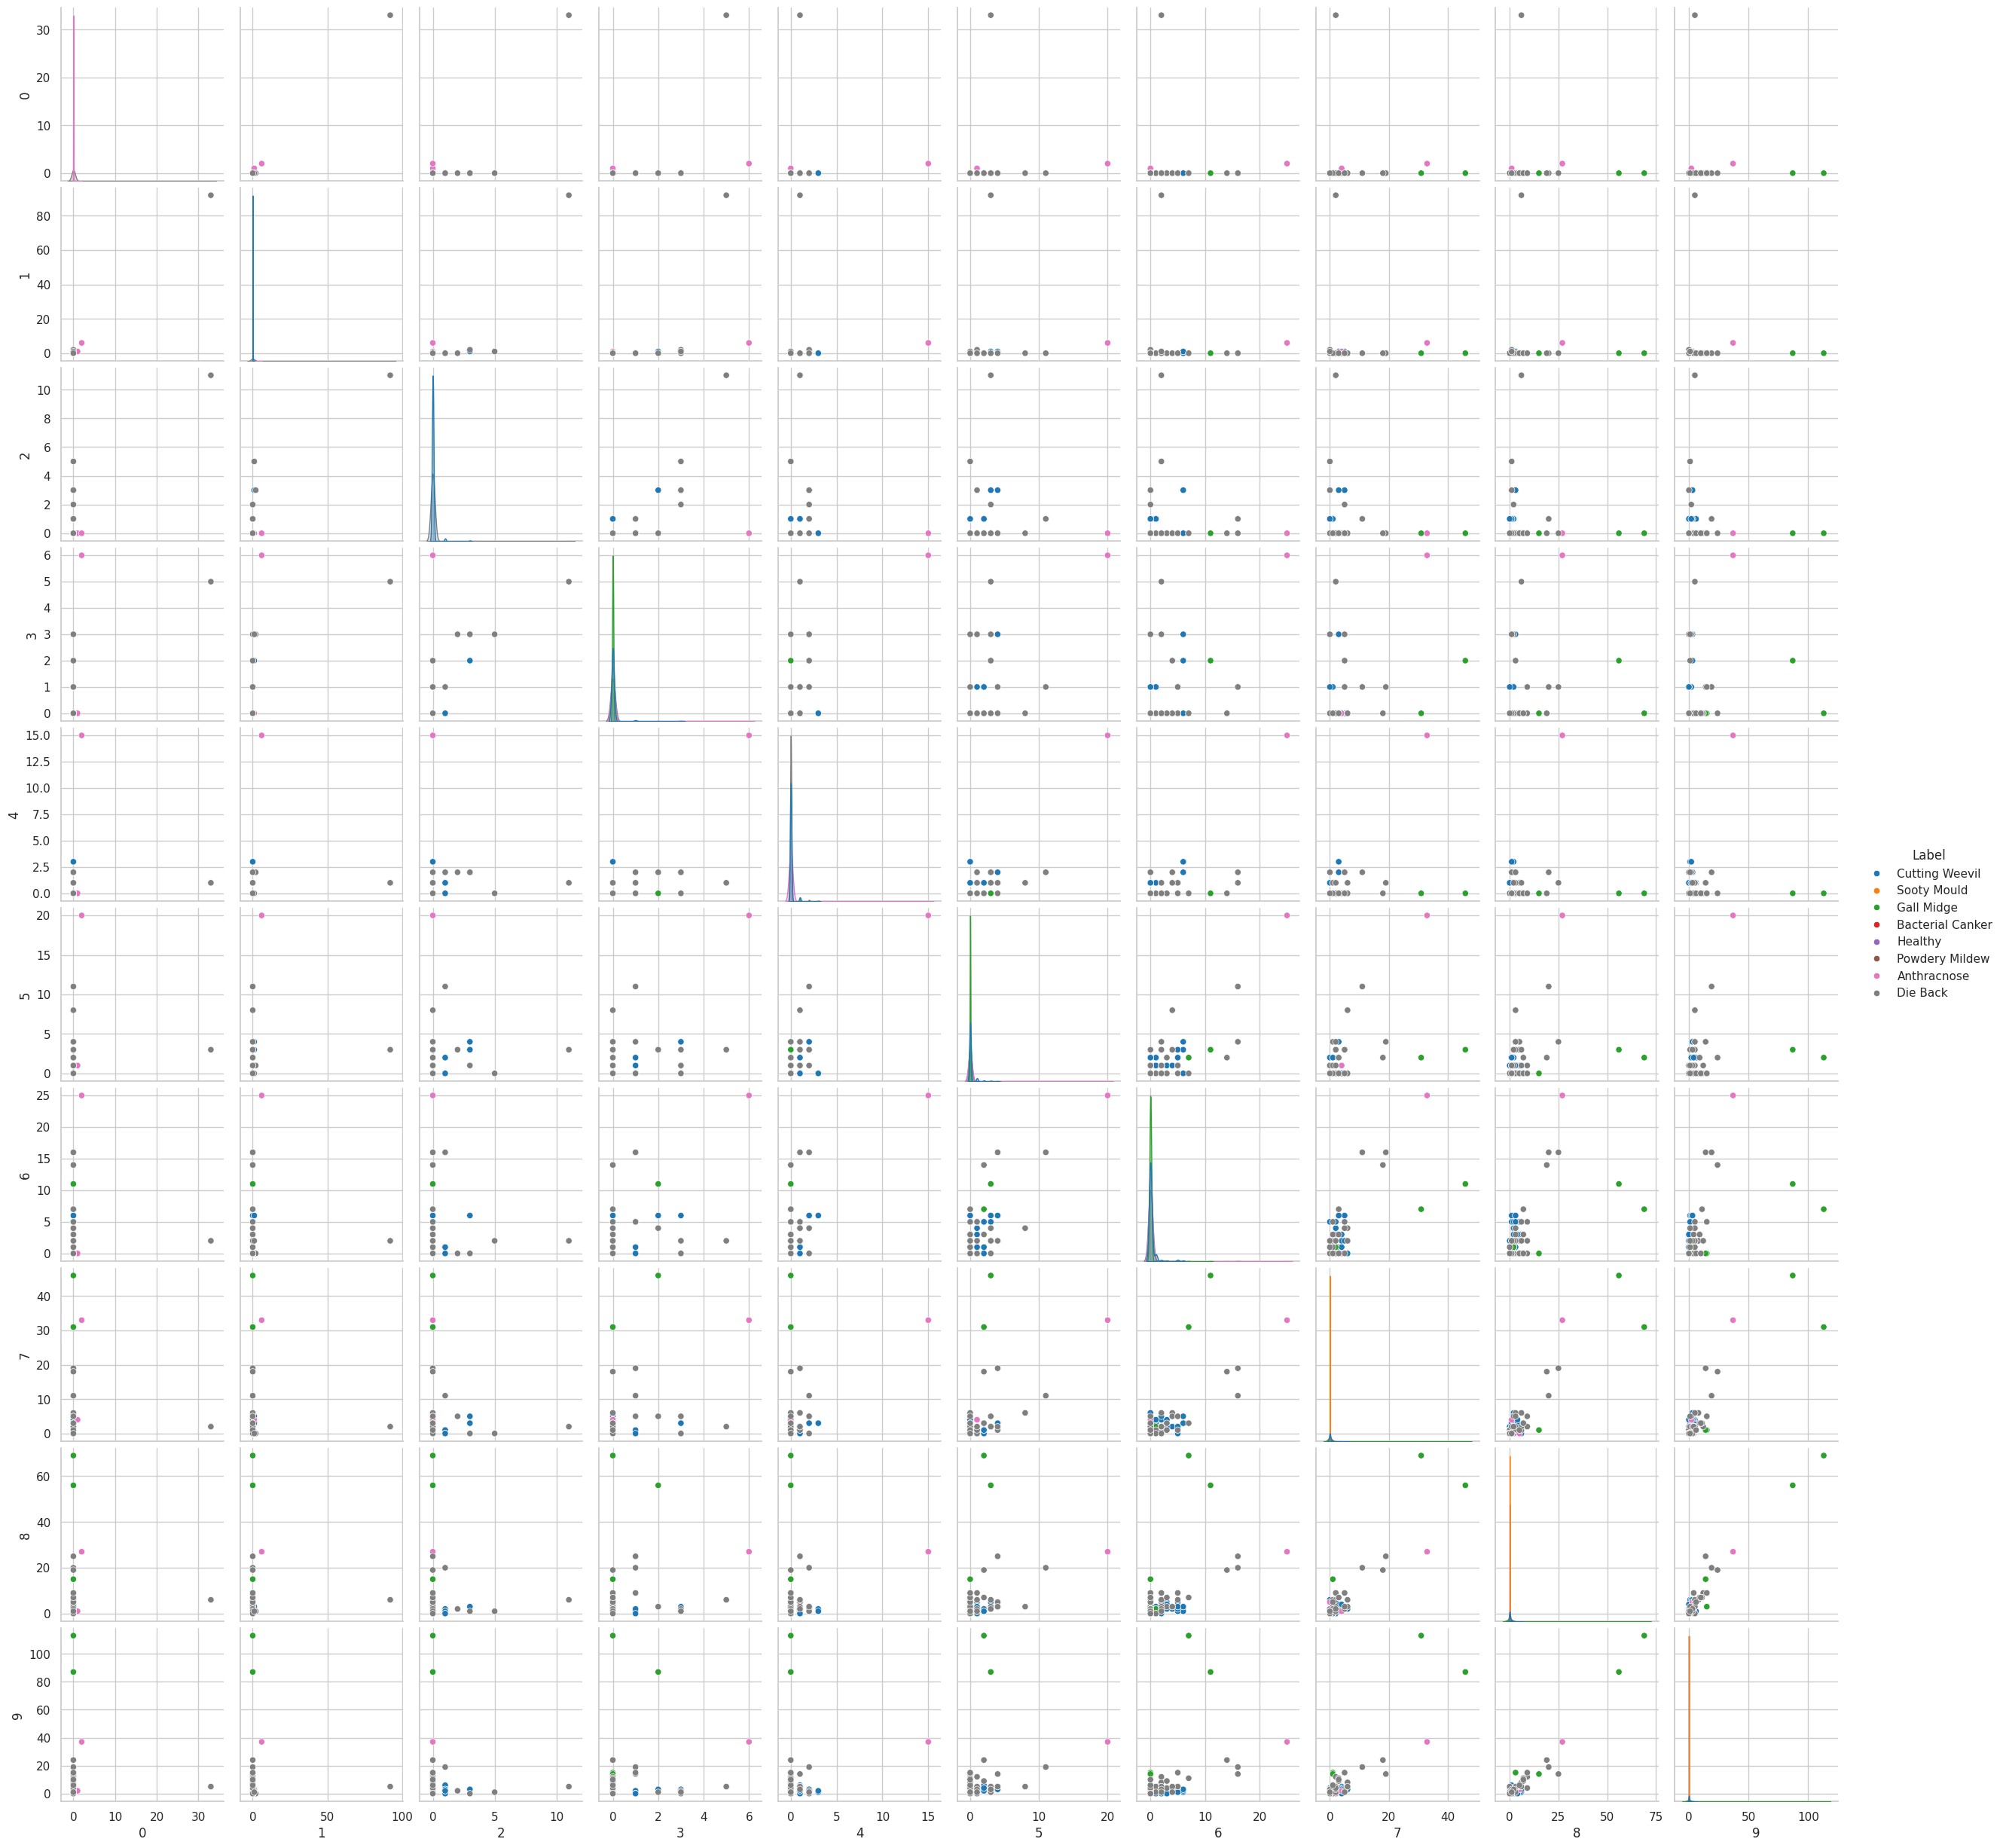

In [11]:
# Plot the scatter matrix with hue set to "Label" for color coding by class
plt.figure(figsize=(12, 8))
pair_plot = sns.pairplot(subset_df, hue="Label", palette="tab10",
                         diag_kind="kde")

# ***Decision Tree Using scikit-learn***

In [13]:
# Define the features and the target
X = df.drop('Label', axis=1)  # Fix here: change 'target' to 'Label'
y = df['Label']

# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier with gini criterion and maximum depth of 3
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Fit the model on the train data
dt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt.predict(X_test)


# Calculate the accuracy, precision, recall, and f1-score
acc_dt = accuracy_score(y_test, y_pred)
report_dt = classification_report(y_test, y_pred, zero_division=0)

prec = precision_score(y_test, y_pred, average='macro',zero_division=0)
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Print the results
print(f"Accuracy: {acc_dt:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")


Accuracy: 0.57
Precision: 0.58
Recall: 0.56
F1-score: 0.55


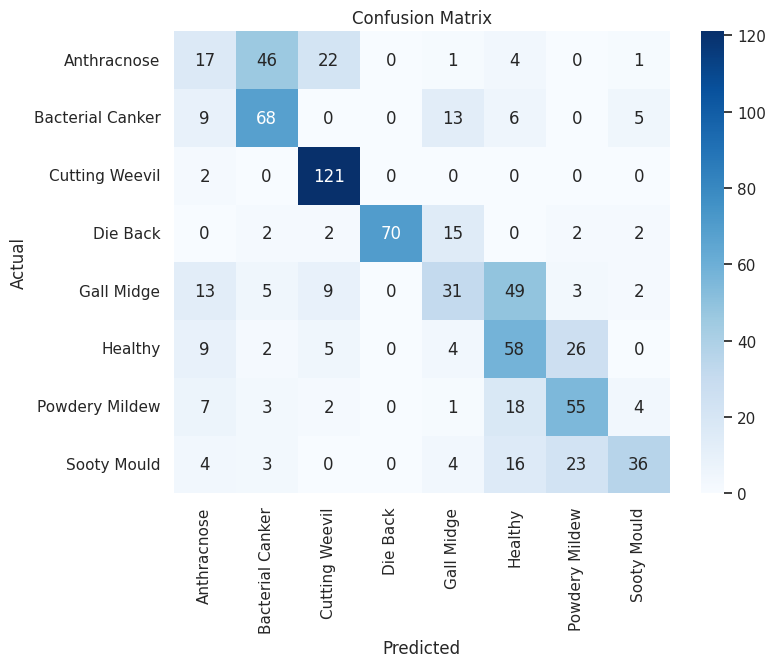

In [15]:
# Plot the confusion matrix
cm_dt = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# Print the classification report
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

     Anthracnose       0.28      0.19      0.22        91
Bacterial Canker       0.53      0.67      0.59       101
  Cutting Weevil       0.75      0.98      0.85       123
        Die Back       1.00      0.75      0.86        93
      Gall Midge       0.45      0.28      0.34       112
         Healthy       0.38      0.56      0.45       104
  Powdery Mildew       0.50      0.61      0.55        90
     Sooty Mould       0.72      0.42      0.53        86

        accuracy                           0.57       800
       macro avg       0.58      0.56      0.55       800
    weighted avg       0.58      0.57      0.56       800



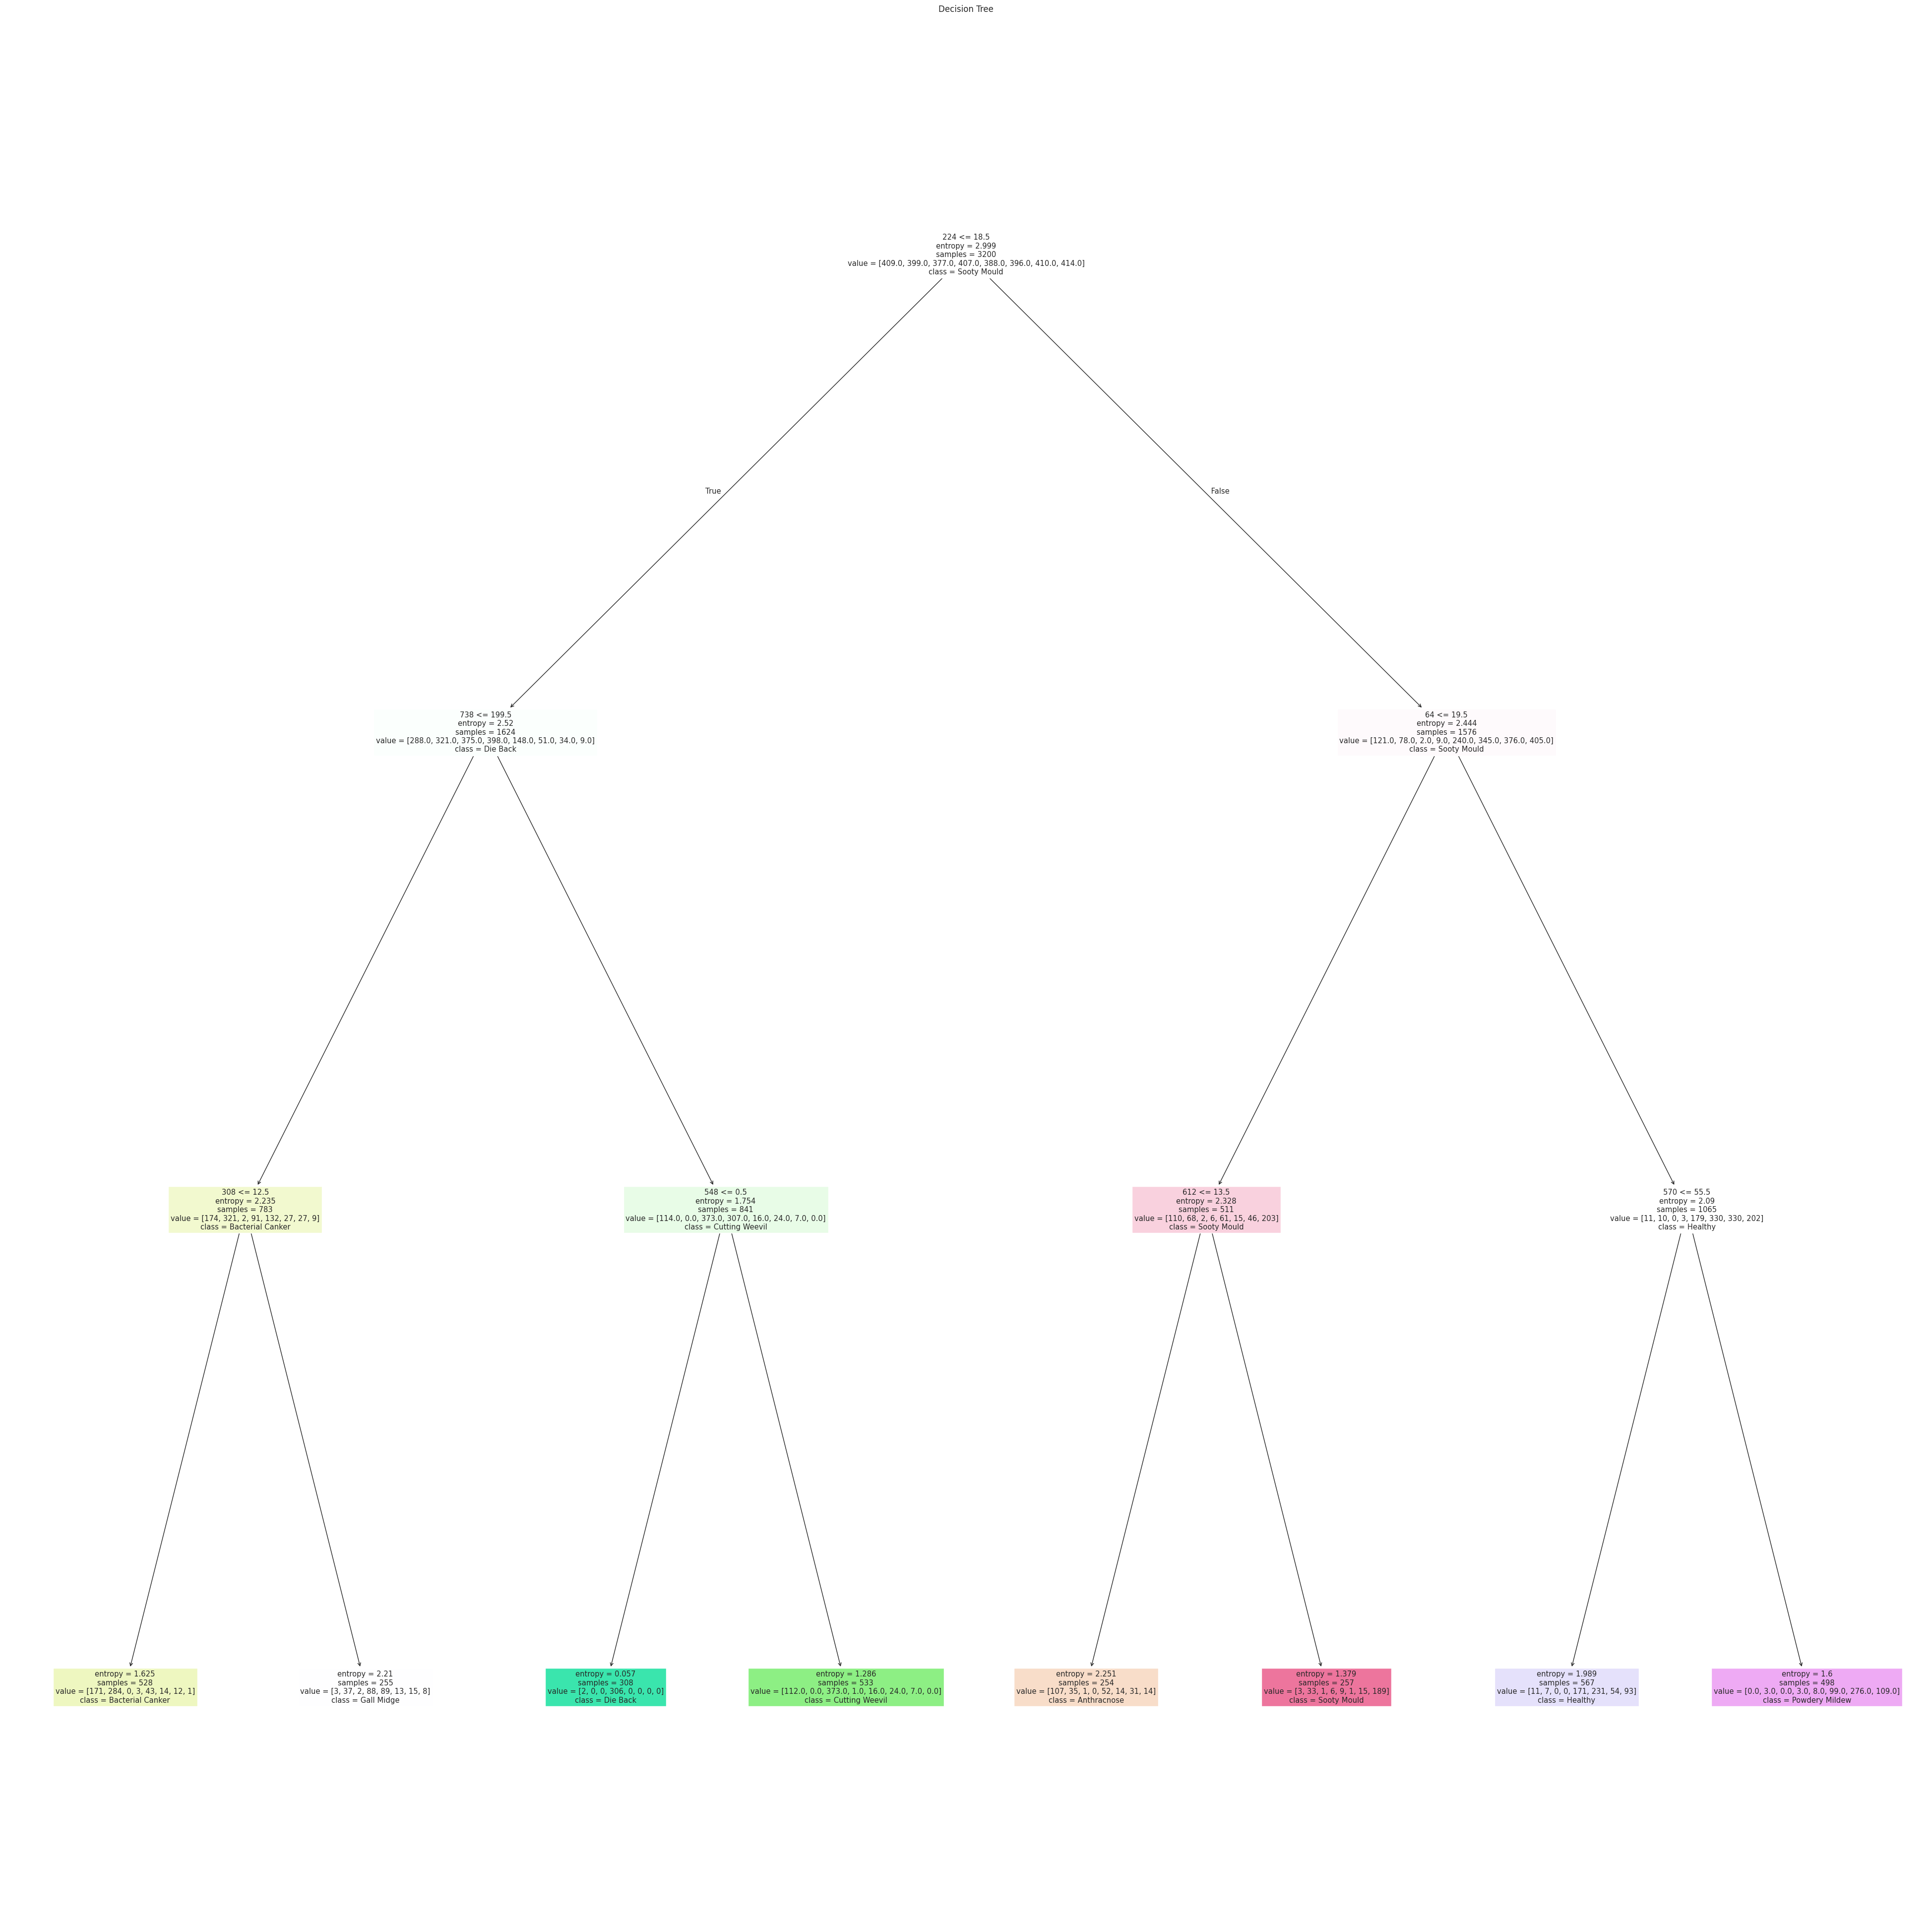

In [17]:
# Plot the decision tree
plt.figure(figsize=(50, 50))
plot_tree(dt, feature_names=X.columns, class_names=np.unique(y), filled=True)
plt.title('Decision Tree')
plt.show()


# ***RANDOM FOREST***



n_estimators = 1, Accuracy: 0.75
n_estimators = 50, Accuracy: 0.94
n_estimators = 100, Accuracy: 0.95
n_estimators = 150, Accuracy: 0.95
n_estimators = 200, Accuracy: 0.95
n_estimators = 250, Accuracy: 0.95


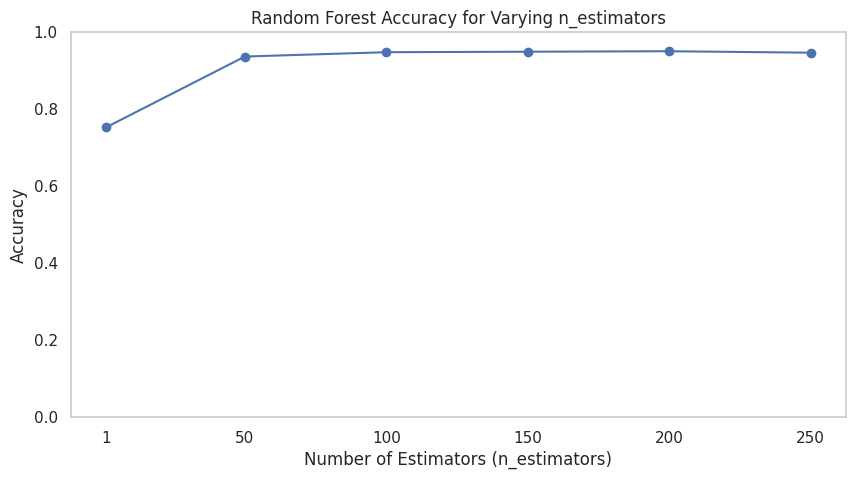

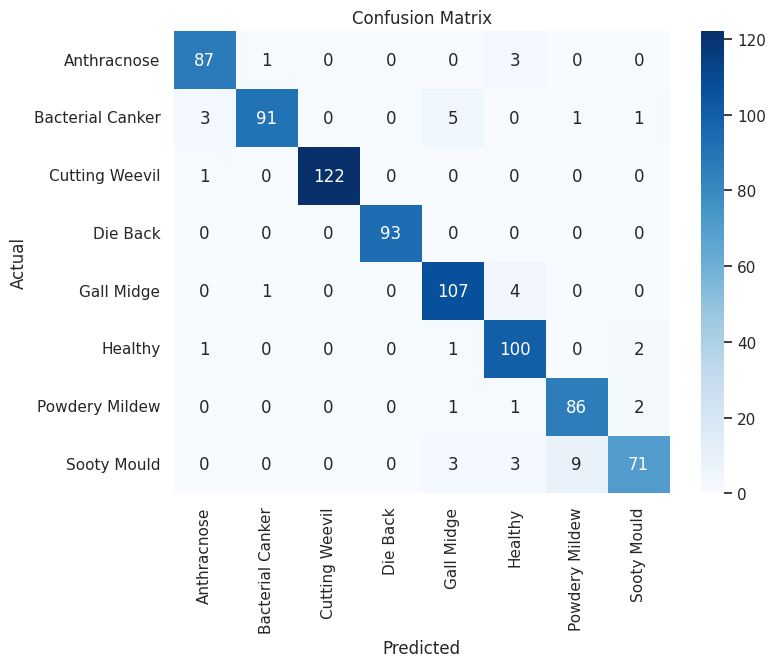

In [18]:
X = df.drop('Label', axis=1)  # Exclude the target column for features
y = df['Label'].values  # Convert target to array

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

n_estimators_values = [1, 50, 100, 150, 200, 250]
accuracies = []

# Train and evaluate Random Forest for each n_estimators value
for n in n_estimators_values:
    rf_classifier = RandomForestClassifier(n_estimators=n, random_state=42)
    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    accuracy_rf = accuracy_score(y_test, y_pred)
    report_rf = classification_report(y_test, y_pred)

    accuracies.append(accuracy_rf)

# Print the results
for n, acc in zip(n_estimators_values, accuracies):
    print(f"n_estimators = {n}, Accuracy: {acc:.2f}")

# Plotting the accuracy results
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_values, accuracies, marker='o')
plt.title('Random Forest Accuracy for Varying n_estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.xticks(n_estimators_values)  # Set x-ticks to n_estimators values
plt.ylim([0, 1])  # Set y-axis limits from 0 to 1
plt.grid()



# Plot the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **Evaluation and Comparison of Decision Tree and Random Forest**

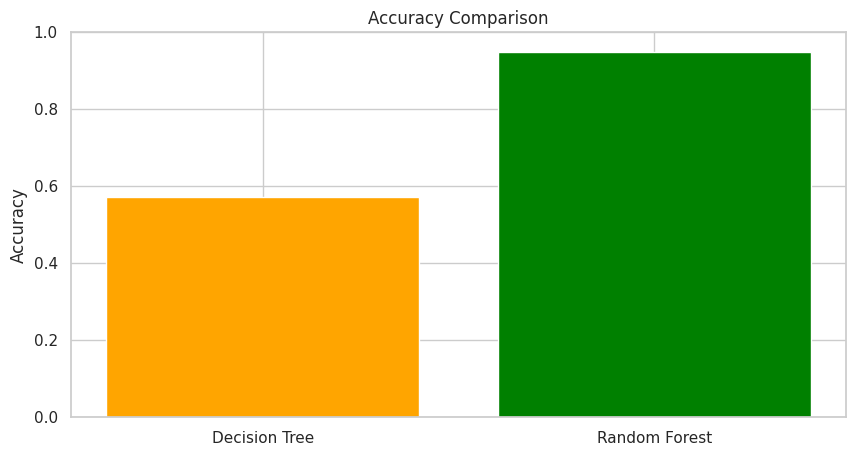

In [19]:
# Compare performance visually
labels = ['Decision Tree', 'Random Forest']
accuracies = [acc_dt, accuracy_rf]

plt.figure(figsize=(10, 5))
plt.bar(labels, accuracies, color=['orange', 'green'])
plt.ylim([0, 1])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()